# Cell Adhesion Assay - Data Analysis

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

Load a <code>pandas.DataFrame</code> from a <code>.csv</code> file. Then <code>display</code> a small sample of the <code>pandas.DataFrame</code> with the <code>head()</code> and <code>tile()</code> methods. The default number of elements to display is 5. However, it is posible to pass a custom number.

In [2]:
data=pd.read_csv('../Data/ResultsTable_Project.csv')
display(data.head(3))
display(data.tail(3))

,n,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
0,1,A,1,1,1.1009,0.0,0.5021,0.8354,2,0.1199,16.6777
1,2,A,1,2,0.7686,0.0,0.5493,0.7794,2,0.1119,17.8767
2,3,A,1,3,0.7961,0.0,0.6169,0.8494,6,0.1219,49.2098


,n,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
21,22,B,4,1,3.0666,0.0,0.04762,0.010740,1,0.001542,648.4877
22,23,B,4,2,3.0678,0.0,0.01471,0.002991,1,0.000429,2329.2620
23,24,B,4,3,3.2268,0.0,0.06250,0.031130,1,0.004468,223.7918


Overview of data

In [3]:
# overview of the numerical data
display(data.describe())

,n,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
count,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,2.50000,2.000000,1.818338,0.272879,0.609059,0.463974,3.750000,0.066610,246.302688
std,7.071068,1.14208,0.834058,1.197747,0.545870,0.373091,0.373651,3.650491,0.053644,510.074972
min,1.000000,1.00000,1.000000,0.383000,0.000000,0.014710,0.002991,1.000000,0.000429,7.570100
25%,6.750000,1.75000,1.000000,0.739325,0.000000,0.362955,0.097830,1.000000,0.014043,45.559100
50%,12.500000,2.50000,2.000000,1.424450,0.000000,0.693700,0.553400,2.000000,0.079445,85.107050
75%,18.250000,3.25000,3.000000,3.066900,0.053400,0.934825,0.832625,6.000000,0.119525,167.079725
max,24.000000,4.00000,3.000000,3.561200,1.782200,1.000000,0.920200,12.000000,0.132100,2329.262000


In [4]:
# create a mask for each eow
maskA = data.loc[:,'Row']=='A'
maskB = data.loc[:,'Row']=='B'
display(data.loc[maskA].head(3))
display(data.loc[maskB].head(3))

,n,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
0,1,A,1,1,1.1009,0.0,0.5021,0.8354,2,0.1199,16.6777
1,2,A,1,2,0.7686,0.0,0.5493,0.7794,2,0.1119,17.8767
2,3,A,1,3,0.7961,0.0,0.6169,0.8494,6,0.1219,49.2098


,n,Row,Column,Field,Mean/s.d.,%SatPix,MaxCountRatio,MonoAreaFraction,Cells,MonolayerArea(mm2),Cells/mm2
12,13,B,1,1,0.4927,0.0,0.4583,0.8317,11,0.1194,92.1312
13,14,B,1,2,0.4790,0.0,0.6017,0.8267,6,0.1187,50.5614
14,15,B,1,3,0.6515,0.0,0.6017,0.8412,6,0.1208,49.6846


Text(0.5, 0, 'Column')

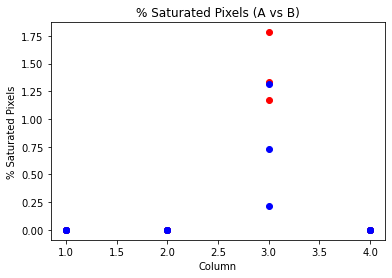

In [5]:
# Plot a scatter for each row in a unqiue colour showing n against %SatPix
plt.scatter(data.loc[maskA,'Column'],data.loc[maskA,'%SatPix'],color='#FF0000',label='Row A')
plt.scatter(data.loc[maskB,'Column'],data.loc[maskB,'%SatPix'],color='#0000FF',label='Row B')
# Add a title and axis labels
plt.title('% Saturated Pixels (A vs B)')
plt.ylabel('% Saturated Pixels')
plt.xlabel('Column')

In [6]:
plt?